In [3]:
library(mixtools)

mixtools package, version 1.1.0, Released 2017-03-10
This package is based upon work supported by the National Science Foundation under Grant No. SES-0518772.




In [4]:
data(NOdata)

In [6]:
head(NOdata)

,NO,Equivalence
,<dbl>,<dbl>
1,3.741,0.907
2,2.295,0.761
3,1.498,1.108
4,2.881,1.016
5,0.760,1.189
6,3.120,1.001


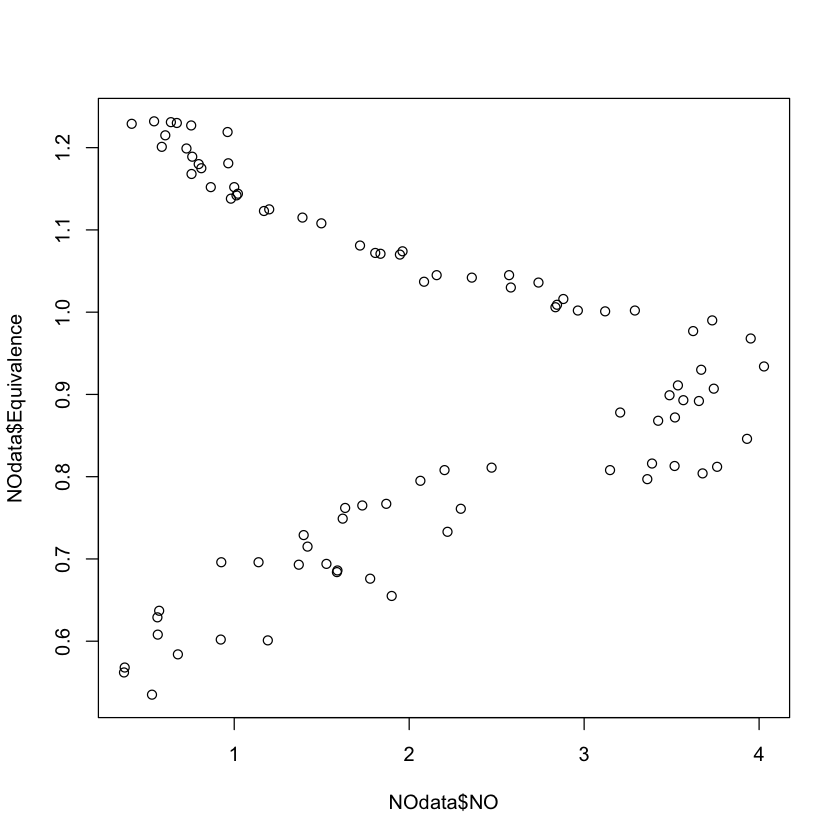

In [8]:
plot(NOdata$NO, NOdata$Equivalence)

In [11]:
res <- regmixEM(NOdata$NO, NOdata$Equivalence, k=2)

number of iterations= 36 


In [35]:
res$beta

,comp.1,comp.2
beta.0,-4.131050,10.761404
beta.1,8.130936,-8.292076


In [32]:
x = seq(0, 4, length=100)

In [33]:
y1 = (8.130936)*x -4.131050
y2 = (-8.292076)*x +10.761404

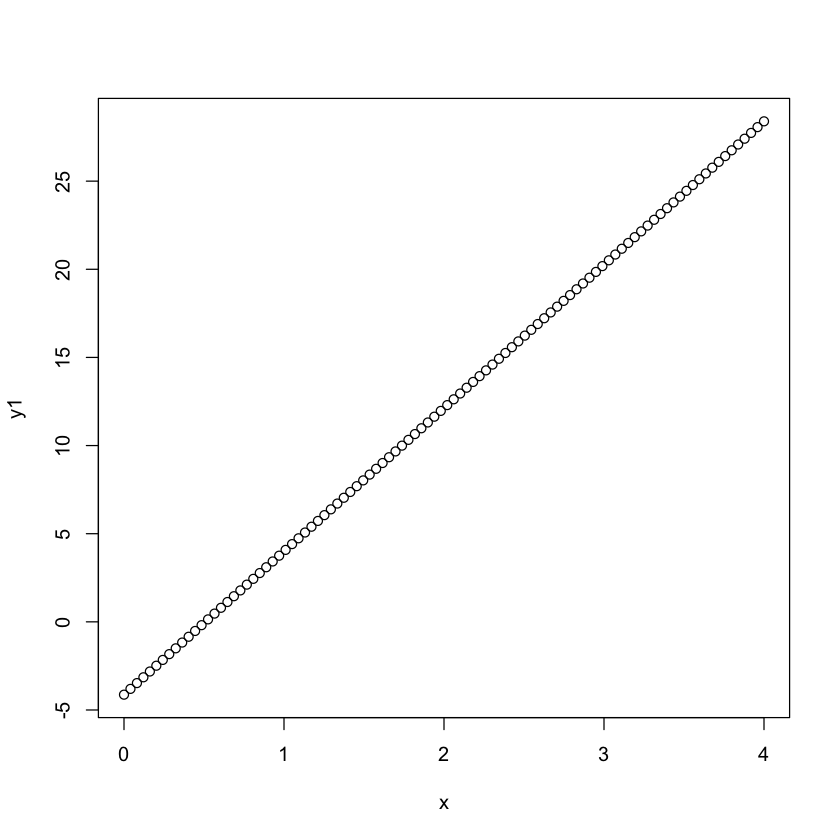

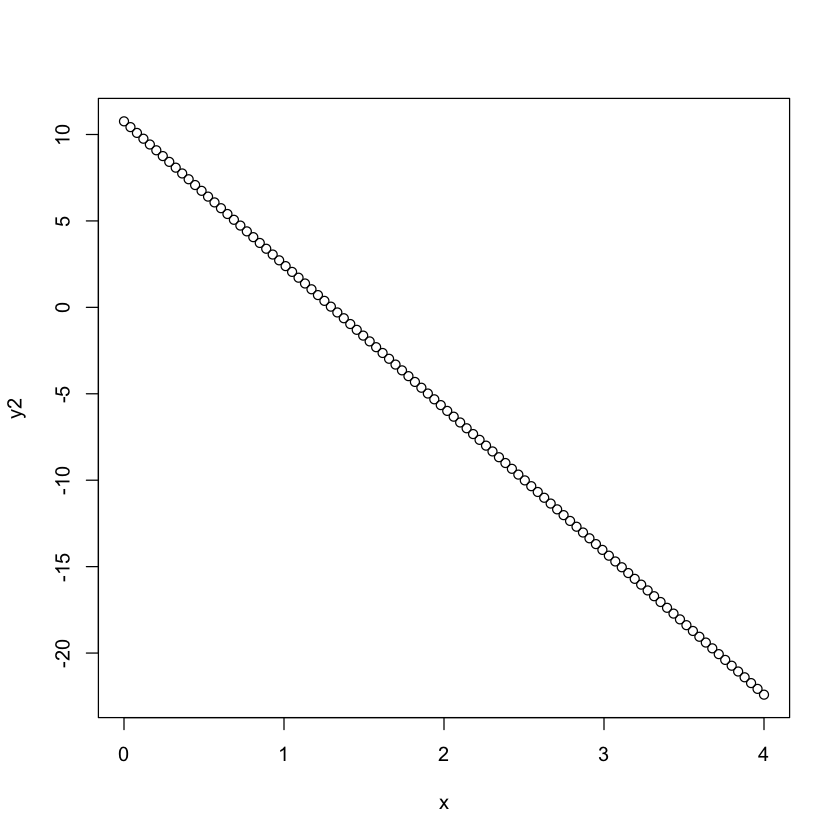

In [34]:
plot(x, y1)
plot(x, y2)